Set Data path

In [229]:
dataCSV=[
   
"../All_Data/finish/手2022-05-31 112100.csv",
# ok
"../All_Data/finish/手2022-05-31 112600.csv",
# 需平移
"../All_Data/finish/手2022-05-31 113000.csv",
# 需平移
"../All_Data/finish/手2022-05-31 113400.csv",
# 怪怪ㄉ
"../All_Data/finish/手2022-05-31 113600.csv",
# ok
"../All_Data/finish/手2022-05-31 114800.csv",
# ok
"../All_Data/finish/手2022-05-31 115100.csv",
# ok
"../All_Data/finish/手2022-05-31 115600.csv",
# 後半部須微調
"../All_Data/finish/手2022-05-31 115900.csv",
# ok




"../All_Data/finish/腳2022-05-31 112100.csv",
# 需平移
"../All_Data/finish/腳2022-05-31 112600.csv",
# 需平移
"../All_Data/finish/腳2022-05-31 113000.csv",
# 需平移
"../All_Data/finish/腳2022-05-31 113400.csv",
# 需微調
"../All_Data/finish/腳2022-05-31 113600.csv",
# 需平移
"../All_Data/finish/腳2022-05-31 114800.csv",
# 需平移
"../All_Data/finish/腳2022-05-31 115100.csv",
# 需平移
"../All_Data/finish/腳2022-05-31 115600.csv",
# 需平移
"../All_Data/finish/腳2022-05-31 115900.csv",
# 需平移

  
]

Set file Name

In [230]:
fileName=[]
for i in range(len(dataCSV)):
    newFilename = dataCSV[i].split('/')
    fileName.append(newFilename[len(newFilename)-1][0:len(newFilename[len(newFilename)-1])-4])
    print(fileName)

['手2022-05-31 112100']
['手2022-05-31 112100', '手2022-05-31 112600']
['手2022-05-31 112100', '手2022-05-31 112600', '手2022-05-31 113000']
['手2022-05-31 112100', '手2022-05-31 112600', '手2022-05-31 113000', '手2022-05-31 113400']
['手2022-05-31 112100', '手2022-05-31 112600', '手2022-05-31 113000', '手2022-05-31 113400', '手2022-05-31 113600']
['手2022-05-31 112100', '手2022-05-31 112600', '手2022-05-31 113000', '手2022-05-31 113400', '手2022-05-31 113600', '手2022-05-31 114800']
['手2022-05-31 112100', '手2022-05-31 112600', '手2022-05-31 113000', '手2022-05-31 113400', '手2022-05-31 113600', '手2022-05-31 114800', '手2022-05-31 115100']
['手2022-05-31 112100', '手2022-05-31 112600', '手2022-05-31 113000', '手2022-05-31 113400', '手2022-05-31 113600', '手2022-05-31 114800', '手2022-05-31 115100', '手2022-05-31 115600']
['手2022-05-31 112100', '手2022-05-31 112600', '手2022-05-31 113000', '手2022-05-31 113400', '手2022-05-31 113600', '手2022-05-31 114800', '手2022-05-31 115100', '手2022-05-31 115600', '手2022-05-31 115900']
[

Smooth by d by difference window

In [231]:
def smooth(data,d):
    if(d == 0 ):
        return np.array(data)
    newData=[]
    TimeList= data[:,14]

    for i in range (0,len(data[:,0])-d+1):
        tempJ=[]
        # print(TimeList[i])
        for j in range(0,len(data[0])-1):
            tempK=0
            for k in range(d):
                # print(data[i+k][j])
                tempK += data[i+k][j]
                # print("tempK = " + str(tempK))
            tempJ.append(tempK/d)
            
            # print(len(tempJ))
            # print(tempJ)
        tempJ.append(TimeList[i])
        newData.append(tempJ)
    return np.array(newData)



Plot and draw

In [232]:
def draw(data,index):
    titleDictionary=["hands","foot"]
    fig, (ax1, ax2,ax3) = plt.subplots(3, 1, sharex = False, sharey = False, figsize = (40, 30))
    ax1.set_title(fileName[index][1:]+" "+titleDictionary[index//(len(dataCSV)//2)],fontsize = 30)
    ax2.set_title(fileName[index][1:]+" "+titleDictionary[index//(len(dataCSV)//2)],fontsize = 30)
    ax3.set_title(fileName[index][1:]+" "+titleDictionary[index//(len(dataCSV)//2)],fontsize = 30)


    ax1.plot(data[:,15], data[: , 1], color = 'r', label = "Xg")
    ax1.plot(data[:,15], data[: , 2], color = 'g', label = "Yg")
    ax1.plot(data[:,15], data[: , 3], color = 'b', label = "Zg")
    ax1.legend(loc = "center left", fontsize = 20, bbox_to_anchor = (1, 0.5))
    plt.setp(ax1.get_xticklabels(), fontsize=20)
    plt.setp(ax1.get_yticklabels(), fontsize=20)

    list=[]
    for i in range (len(data[:,16])):
        if data[i,16] =="W":
            list.append(1)
        else:
            list.append(0)
    ax2.plot(data[:,15], list, color = 'r', label = "")
    ax2.legend(loc = "center left", fontsize = 20, bbox_to_anchor = (1, 0.5))
    plt.setp(ax2.get_xticklabels(), fontsize=20)
    plt.setp(ax2.get_yticklabels(), fontsize=20)


    ax3.plot(data[:,15], data[: , 7], color = 'r', label = "Xa")
    ax3.plot(data[:,15], data[: , 8], color = 'g', label = "Ya")
    ax3.plot(data[:,15], data[: , 9], color = 'b', label = "Za")
    ax3.legend(loc = "center left", fontsize = 20, bbox_to_anchor = (1, 0.5))
    plt.setp(ax3.get_xticklabels(), fontsize=20)
    plt.setp(ax3.get_yticklabels(), fontsize=20)
    
    plt.savefig( path+'/'+ fileName[index]+'.png')
    fig.show()
    

In [233]:
def drawfft(data,index):
    titleDictionary=["hands","foot"]
    fig, ax= plt.subplots(2, 3, sharex = False, sharey = False, figsize = (30, 10))
    ax[0,0].specgram(data[:,1],Fs=1,NFFT=18,noverlap=17,cmap='plasma',xextent=(0,data[len(data[:,0])-1][15]))
    ax[0,1].specgram(data[:,2],Fs=1,NFFT=18,noverlap=17,cmap='plasma',xextent=(0,data[len(data[:,0])-1][15]))
    ax[0,2].specgram(data[:,3],Fs=1,NFFT=18,noverlap=17,cmap='plasma',xextent=(0,data[len(data[:,0])-1][15]))
    ax[1,0].specgram(data[:,7],Fs=1,NFFT=18,noverlap=17,cmap='plasma',xextent=(0,data[len(data[:,0])-1][15]))
    ax[1,1].specgram(data[:,8],Fs=1,NFFT=18,noverlap=17,cmap='plasma',xextent=(0,data[len(data[:,0])-1][15]))
    ax[1,2].specgram(data[:,9],Fs=1,NFFT=18,noverlap=17,cmap='plasma',xextent=(0,data[len(data[:,0])-1][15]))
    
    ax[0,0].set_title("Xg fft",fontsize = 30)
    ax[0,1].set_title("Yg fft",fontsize = 30)
    ax[0,2].set_title("Zg fft",fontsize = 30)
    ax[1,0].set_title("Xa fft",fontsize = 30)
    ax[1,1].set_title("Ya fft",fontsize = 30)
    ax[1,2].set_title("Za fft",fontsize = 30)
    
    plt.savefig( path+'/'+ fileName[index]+' fft'+'.png')
    fig.show()
    

Make file

In [234]:
import os
def mkdir(path):
    #判斷目錄是否存在
    #存在：True
    #不存在：False
    folder = os.path.exists(path)

    #判斷結果
    if not folder:
        #如果不存在，則建立新目錄
        os.makedirs(path)
        print('-----建立成功-----')

    else:
        #如果目錄已存在，則不建立，提示目錄已存在
        print(path+'目錄已存在')


In [235]:
def diff(data):

    temp =[]
    for index in range(len(data)-1):
        temp.append((data[index+1])-data[index])
        # print(data[index]+1,data[index],(data[index]+1)-data[index])
    # print(temp)
    print(np.max(temp))

image/2022-05-31 115900目錄已存在
[4.16 4.16 4.16 ... 0.48 0.48 0.48]
1295


/var/folders/nn/k75mfp3946lf7jzz8pdhmkyr0000gn/T/ipykernel_12126/2237821331.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


'it can run all'

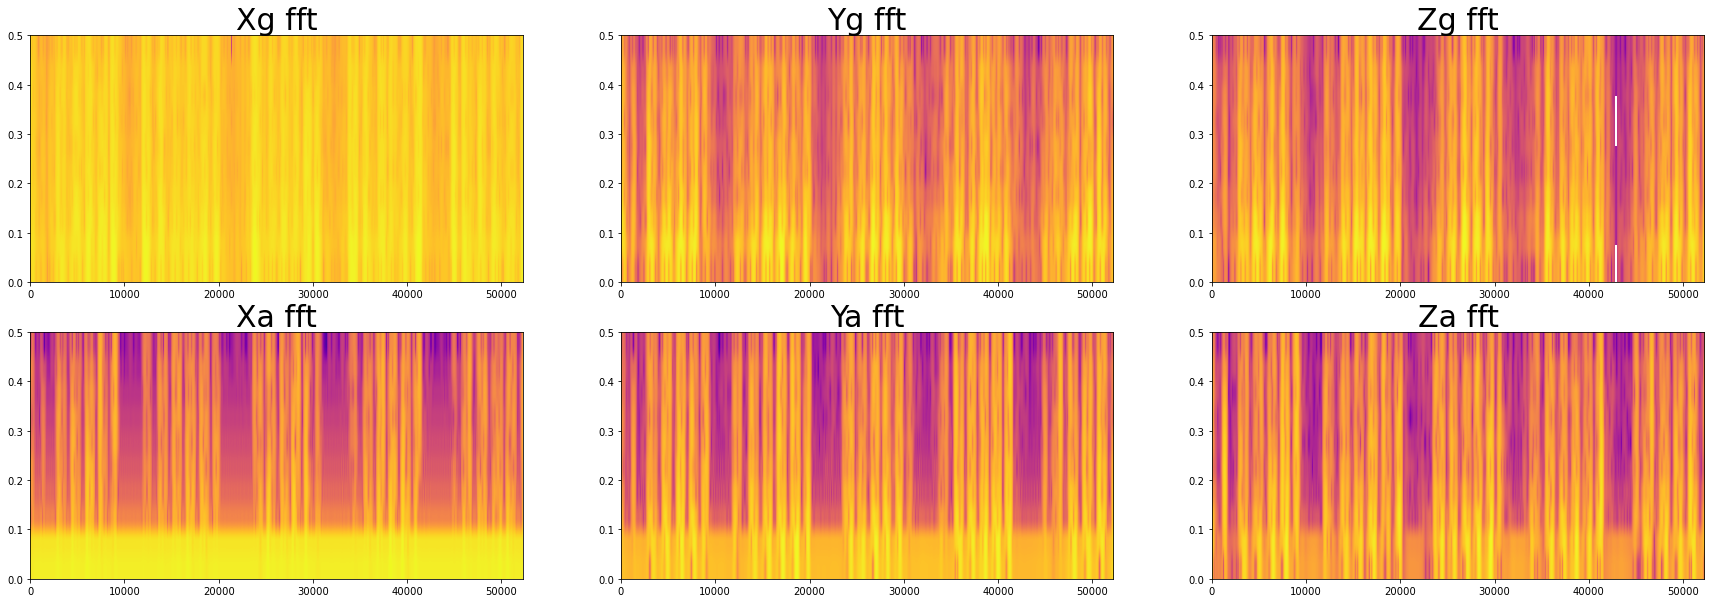

In [274]:
import serial
import csv
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft, ifft
import math
line=["Xg","Yg","Zg","Xm","Ym","Zm","Xa","Ya","Za","Xq","Yq","Zq","direc"]
colorSet=['r','g','b','y']

data = pd.read_csv(dataCSV[0])
data = np.array(data)
index=17


common_ratio=0
data = pd.read_csv(dataCSV[index])
data = np.array(data)
# print(data[:,16])
if (common_ratio > 0):
    path = 'image/' + fileName[index][1:] + " smooth by " +str(common_ratio)
else:
    path = 'image/' + fileName[index][1:]
mkdir(path)
# draw(data,index)
# diff(data[:,14])
# print(data[len(data[:,0])-1])
print((data[:,1]))
print(len(data[:,1]))

drawfft(data,index)

'''it can run all'''

# for index in range(len(dataCSV)):
#     common_ratio=0
#     data = pd.read_csv(dataCSV[index])
#     data = np.array(data)

#     if (common_ratio > 0):
#         path = 'image/' + fileName[index][1:] + " smooth by " +str(common_ratio)
#     else:
#         path = 'image/' + fileName[index][1:]
#     mkdir(path)
#     draw(data,index)
#     # print(data[:,14])
#     # diff(data[:,14])





